In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

Iteration 1, RMSE: 112.29266798189543
Iteration 2, RMSE: 120.55793525687433
Iteration 3, RMSE: 105.24394250143341
Iteration 4, RMSE: 123.37070784116023
Iteration 5, RMSE: 150.11111212274815
Iteration 6, RMSE: 141.28073213753095
Iteration 7, RMSE: 144.5550769552859
Iteration 8, RMSE: 137.79035038202295
Iteration 9, RMSE: 139.25065963281153
Iteration 10, RMSE: 121.2645386782971
Iteration 11, RMSE: 119.7891994307734
Iteration 12, RMSE: 101.81853347977061
Iteration 13, RMSE: 108.13628535137208
Iteration 14, RMSE: 81.92164115295432
Iteration 15, RMSE: 96.50971863728792
Iteration 16, RMSE: 101.846733748064
Iteration 17, RMSE: 104.38838170642167
Iteration 18, RMSE: 111.79212461872285
Iteration 19, RMSE: 109.76757992220237
Iteration 20, RMSE: 105.98385097741362
Iteration 21, RMSE: 128.55525777304726
Iteration 22, RMSE: 132.26579669531134
Iteration 23, RMSE: 131.00970245657123
Iteration 24, RMSE: 124.4097398586499
Iteration 25, RMSE: 120.50451106531455
Iteration 26, RMSE: 124.95033705058704
Ite

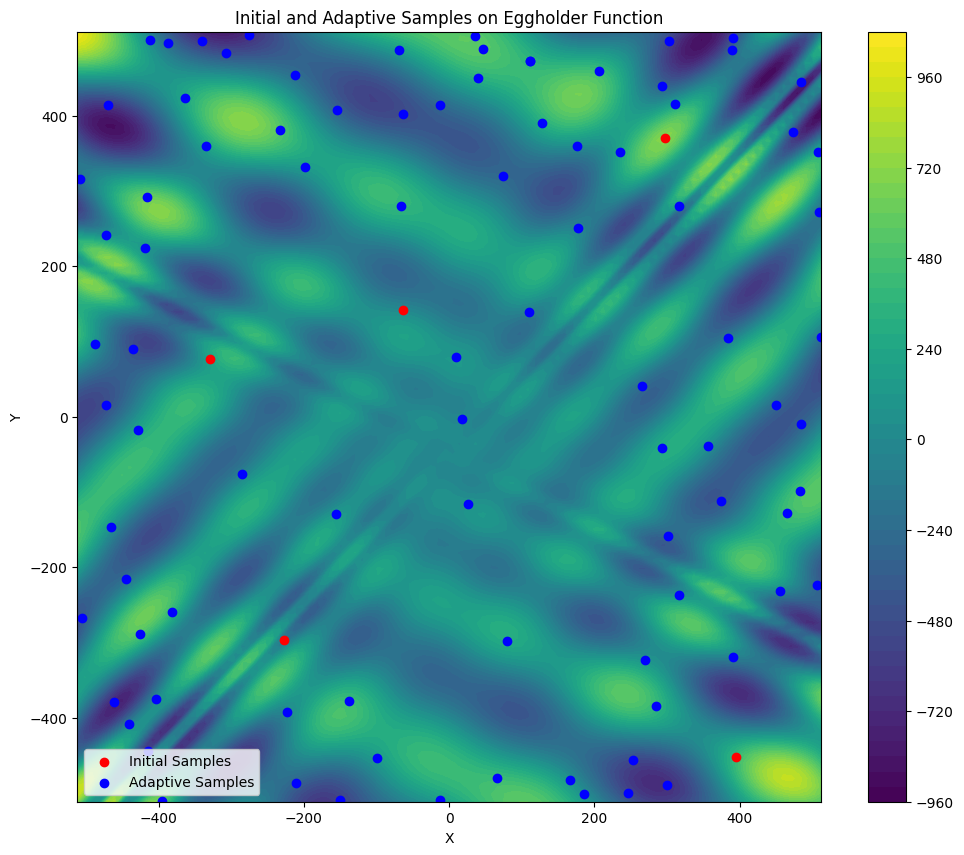

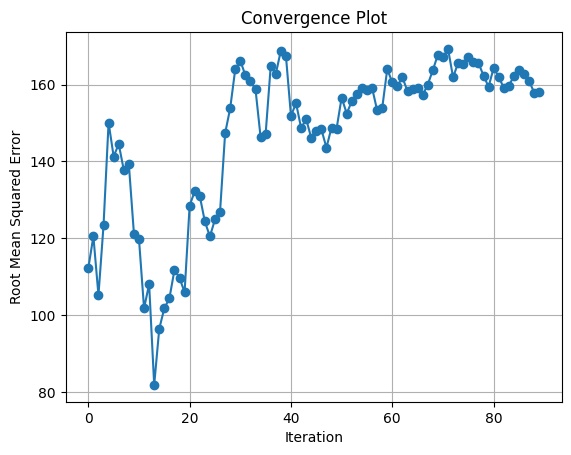

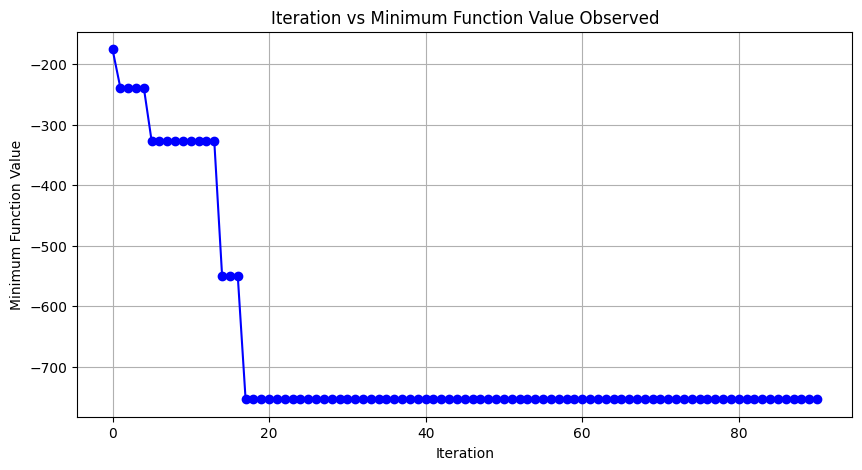

Best observed function value after active learning: -753.7806184591836
            X1          X2
0  -328.496282   76.664104
1   -63.875959  141.748487
2   296.500151  370.140438
3   394.810946 -452.999676
4  -227.726705 -296.356132
..         ...         ...
91  316.490116  280.432814
92 -212.717814  454.815332
93 -232.426039  381.875318
94  110.985508  473.243102
95  110.985508  473.243102

[96 rows x 2 columns]


In [2]:
# Generate a mesh for the background function
X, Y, Z = samplers.Sampler.generate_mesh(x_range=(-512, 512), y_range=(-512, 512), num_points=100, function=ex_func.eggholder)

# Generate initial samples
lhs_sampler = samplers.LatinHypercubeSampling(ex_func.eggholder)
initial_points = lhs_sampler.sample(num_samples=5, x_min=-512, y_min=-512, x_max=512, y_max=512)
initial_values = np.array([ex_func.eggholder([x, y]) for x, y in initial_points])

# Train the initial model
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, lhs_sampler)
min_function_values, improvement, new_points_all = active_learning.run_active_learning()

# Plot the results
sampling_vis = gen_def.SamplingVisualization(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_results(X, Y, Z)
